# Homework

This homework will drop you in the deep end a bit, but let you flex some analytical muscles!

Your task? Take the Artificial HES data and using pandas, do some analysis! Follow the steps laid out, but if there's another area you'd like to dig into, feel free!

Interested in finding more about the data? There's a .xlsx file that describes what each column and value means.
 
https://digital.nhs.uk/data-and-information/data-tools-and-services/data-services/hospital-episode-statistics/hospital-episode-statistics-data-dictionary 

In [1]:
# These libraries will help us download the file
import zipfile
import io
from pathlib import Path
import requests

zip_file_url = "https://files.digital.nhs.uk/assets/Services/Artificial%20data/Artificial%20HES%20final/artificial_hes_ae_202302_v1_sample.zip"
path_to_downloaded_data = "data_in/artificial_hes_ae_202302_v1_sample.zip/artificial_hes_ae_202302_v1_sample/artificial_hes_ae_2122.csv"

filename = Path(zip_file_url).name
output_path = f"data_in/{filename}"

response = requests.get(zip_file_url, stream=True,timeout=3600)
downloaded_zip = zipfile.ZipFile(io.BytesIO(response.content))
downloaded_zip.extractall(output_path)

Step 1: Import the pandas library:

In [2]:
import pandas as pd

# Check pandas version
print(f"Pandas version: {pd.__version__}")

Pandas version: 2.2.3


Step 2: Read the csv file (found at the path_to_downloaded_data) in as a pandas dataframe, and have a look at it

In [3]:
data_df = pd.read_csv(path_to_downloaded_data)
data_df

,FYEAR,PARTYEAR,PSEUDO_HESID,AEKEY,AEKEY_FLAG,AEARRIVALMODE,AEATTEND_EXC_PLANNED,AEATTENDCAT,AEATTENDDISP,AEDEPTTYPE,...,LSOA11,MSOA11,PROVDIST,PROVDIST_FLAG,NER_GP_PRACTICE,NER_RESIDENCE,NER_TREATMENT,SITETRET,SITEDIST,SITEDIST_FLAG
0,2122,202103,TESTqPNh7HEHdm1sB5QlvVaSQZS7BekK,910587081231,1,2,1,1,3,1,...,E01000385,E02001768,19.37,3.0,QKS,QKS,QHM,RW601,4.89,5.0
1,2122,202103,TESTqPNh7HEHdm1sB5QlvVaSQZS7BekK,747777461989,1,2,1,1,3,1,...,E01030571,E02004833,3.96,3.0,QMJ,QYG,QKS,RY901,1.21,5.0
2,2122,202103,TESTqPNh7HEHdm1sB5QlvVaSQZS7BekK,244053969711,1,2,1,1,3,3,...,E01008938,E02005828,NaN,3.0,QWE,QKK,QWO,RJC02,15.16,5.0
3,2122,202103,TESTqPNh7HEHdm1sB5QlvVaSQZS7BekK,425257514835,1,2,1,1,1,1,...,E01030533,E02000912,23.68,3.0,QMJ,QRV,QOP,RJE07,3.16,5.0
4,2122,202103,TESTqPNh7HEHdm1sB5QlvVaSQZS7BekK,892001219292,1,2,1,1,3,1,...,E01025434,E02004315,5.85,3.0,QMF,QM7,QMJ,RDE03,2.41,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2122,202103,TESTn5S3x17z6OUobKDuunS3i3Kt3DEx,674418663776,1,2,1,1,6,1,...,E01024902,E02005474,16.59,3.0,QOP,QUA,QMJ,RC979,18.83,5.0
9996,2122,202103,TESTn5S3x17z6OUobKDuunS3i3Kt3DEx,383591281686,1,2,1,1,1,1,...,E01025347,E02001381,3.14,3.0,Y,QWO,QWO,RA701,1.63,5.0
9997,2122,202103,TESTFACawnRyvo0yFNHrWEvWK60hkmBz,17907345944,1,2,1,1,2,3,...,E01028506,E02003764,7.91,3.0,QUE,QM7,QJM,RAPNM,14.44,5.0
9998,2122,202103,TESTETfkr64gqmNVi9qYLEcrcOC9Lnxw,343239391585,1,1,1,1,7,3,...,E01004390,E02000305,4.69,3.0,QOX,QOQ,QHL,RWJ01,1.89,5.0


There's 165 columns in the df, so let's just pick a few.
Keep columns: "EPIKEY", "CCG_GP_PRACTICE", "ARRIVALDATE"

In [4]:
data_df2 = data_df[["EPIKEY", "CCG_GP_PRACTICE", "ARRIVALDATE"]]
data_df2

,EPIKEY,CCG_GP_PRACTICE,ARRIVALDATE
0,870626682566,02A,2021-04-01
1,421928688730,26A,2021-06-25
2,913266136591,01H,2021-06-02
3,440934773111,36L,2021-05-18
4,232094127215,15N,2021-04-11
...,...,...,...
9995,844711937804,26A,2021-04-29
9996,887931767755,11J,2021-06-06
9997,353849632481,W2U3Z,2021-06-09
9998,221408424072,06K,2021-05-20


Now, for filtering and sorting.

- Sort the df by ARRIVALDATE, so that the date is descending. 
- Filter for ARRIVALDATE after 2021-04-01 and before 2021-05-01.
- Only include those with CCG_GP_PRACTICE 06K, 02A or 15M.

In [12]:
data_df3 = data_df2.sort_values("ARRIVALDATE", ascending=False)
data_df3 = data_df3[(data_df3["ARRIVALDATE"] > "2021-04-01") & (data_df3["ARRIVALDATE"] < "2021-05-01") & (data_df3["CCG_GP_PRACTICE"].isin(["06K", "02A", "15M"]))]
data_df3

,EPIKEY,CCG_GP_PRACTICE,ARRIVALDATE
7932,383781473626,06K,2021-04-30
6796,890934583379,15M,2021-04-30
9228,529798840942,15M,2021-04-30
1491,548480710928,15M,2021-04-30
1959,812217934971,06K,2021-04-29
...,...,...,...
8337,458488562761,15M,2021-04-04
9776,321720766061,15M,2021-04-03
1515,867796386412,02A,2021-04-03
7899,543979345900,15M,2021-04-02


Create a new dataframe, with two columns: CCG_Code, and CCG_Name:

- 15M: DERBY AND DERBYSHIRE
- 06K: HERTFORDSHIRE AND WEST ESSEX
- 02A: GREATER MANCHESTER

In [15]:
data_df4 = pd.DataFrame({
   "CCG_CODE": ["15M", "06K", "02A"],
    "CCG_NAME": ["DERBY AND DERBYSHIRE", "HERTFORDSHIRE AND WEST ESSEX", "GREATER MANCHESTER"]
})
data_df4

,CCG_CODE,CCG_NAME
0,15M,DERBY AND DERBYSHIRE
1,06K,HERTFORDSHIRE AND WEST ESSEX
2,02A,GREATER MANCHESTER


Join your two dataframes together, on the CCG_Code and the CCG_GP_Practice columns, and drop any unneeded columns.

In [17]:
joined_df = pd.merge(data_df3, data_df4, left_on="CCG_GP_PRACTICE", right_on="CCG_CODE", how="inner")
joined_df = joined_df.drop("CCG_GP_PRACTICE", axis=1)
joined_df

,EPIKEY,ARRIVALDATE,CCG_CODE,CCG_NAME
0,383781473626,2021-04-30,06K,HERTFORDSHIRE AND WEST ESSEX
1,890934583379,2021-04-30,15M,DERBY AND DERBYSHIRE
2,529798840942,2021-04-30,15M,DERBY AND DERBYSHIRE
3,548480710928,2021-04-30,15M,DERBY AND DERBYSHIRE
4,812217934971,2021-04-29,06K,HERTFORDSHIRE AND WEST ESSEX
...,...,...,...,...
94,458488562761,2021-04-04,15M,DERBY AND DERBYSHIRE
95,321720766061,2021-04-03,15M,DERBY AND DERBYSHIRE
96,867796386412,2021-04-03,02A,GREATER MANCHESTER
97,543979345900,2021-04-02,15M,DERBY AND DERBYSHIRE


Now, I want you to find out the count of rows, grouped for each CCG.
Hint: use `groupby([])` and `.size()`

In [26]:
joined_df_grouped = joined_df.groupby(["CCG_NAME"]).size()
joined_df_grouped

CCG_NAME
DERBY AND DERBYSHIRE            53
GREATER MANCHESTER              14
HERTFORDSHIRE AND WEST ESSEX    32
dtype: int64

Use this dataframe to create a bar chart:

<Axes: title={'center': 'Attendances by CCG'}, xlabel='CCG_NAME'>

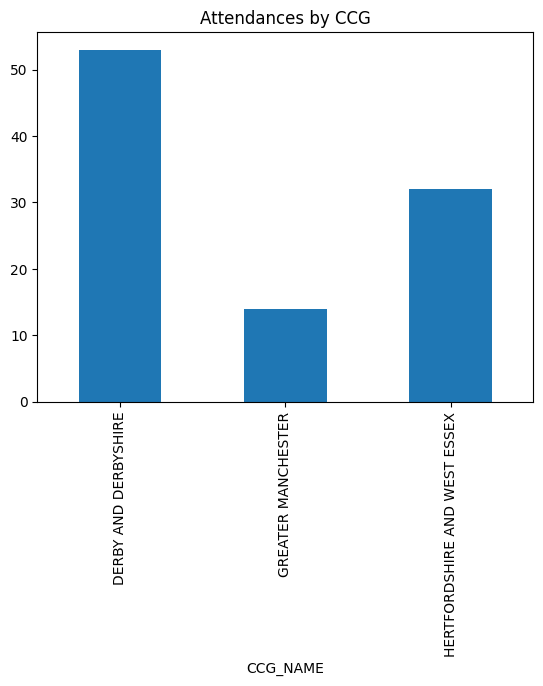

In [27]:
joined_df_grouped.plot(x="CCG_NAME", y="NUMBER_ATTENDS", kind="bar", title="Attendances by CCG")

Remember to push your branch!

- git add .
- git commit -m "commit message"
- git push